In [28]:
import pickle
import matplotlib.pyplot as plt
import os
import torch


In [29]:
results = {}
object_dim = 8
with open(f'trans_abl_{object_dim}_independent.pkl', 'rb') as f:
    results[object_dim] = pickle.load(f)
object_dim = 32
with open(f'trans_abl_{object_dim}_independent.pkl', 'rb') as f:
    results[object_dim] = pickle.load(f)

In [30]:
def get_sat(heatmap, p=1):
    ground_truth = torch.triu(torch.ones(object_dim,object_dim))
    mask = ~torch.eye(object_dim).bool()
    xs = 1 - torch.abs(ground_truth - heatmap)
    xs = torch.pow(1. - xs, p)
    numerator = torch.sum(torch.where(~mask, torch.zeros_like(xs), xs))
    denominator = torch.sum(mask)
    sat = (1. - torch.pow(torch.div(numerator, denominator), 1 / p)).item()
    return sat

In [31]:
Forall_pmean_error_p2 = None
Forall_pmean_error_p10 = None
Forall_min = None
Forall_mean = None

Forall_dict = dict(
Forall_pmean_error_p2=Forall_pmean_error_p2,
Forall_pmean_error_p10=Forall_pmean_error_p10,
Forall_min=Forall_min,
Forall_mean=Forall_mean,
)

Implies_reichenbach = None
Implies_kleene_diene = None
Implies_godel =None
Implies_Goguen = None
Implies_Luk = None
Implies_Reichen_sigm_s3 = None
Implies_Reichen_sigm_s9 = None
Implies_Reichen_sigm_s18 = None



Implies_dict = dict(
    Implies_reichenbach=Implies_reichenbach,
    Implies_Reichen_sigm_s3=Implies_Reichen_sigm_s3,
Implies_Reichen_sigm_s9=Implies_Reichen_sigm_s9,
Implies_Reichen_sigm_s18=Implies_Reichen_sigm_s18,
Implies_kleene_diene=Implies_kleene_diene,
Implies_godel=Implies_godel,
Implies_Goguen=Implies_Goguen,
Implies_Luk=Implies_Luk
)

In [32]:
object_dim = 32

In [33]:
# for Forall in Forall_dict:
#     plt.figure(figsize=(10, 6))
#     plt.title(f"{Forall}")
#     plt.xlabel("Training Steps")
#     plt.ylabel("Satisfiability")

#     training_steps_indices = range(0,41,5)
#     training_steps = [50*i for i in training_steps_indices]

#     for Implies in Implies_dict:
#         sat_values = []
#         data = results[object_dim][Forall][Implies]
#         for i in training_steps_indices:
#             sat = get_sat(data[i])
#             sat_values.append(sat)

#         plt.plot(training_steps,sat_values, label=Implies[8:])

#     plt.ylim(0.4, 1.02)
#     plt.legend(loc='upper left')
#     plt.grid(True)
#     plt.show()

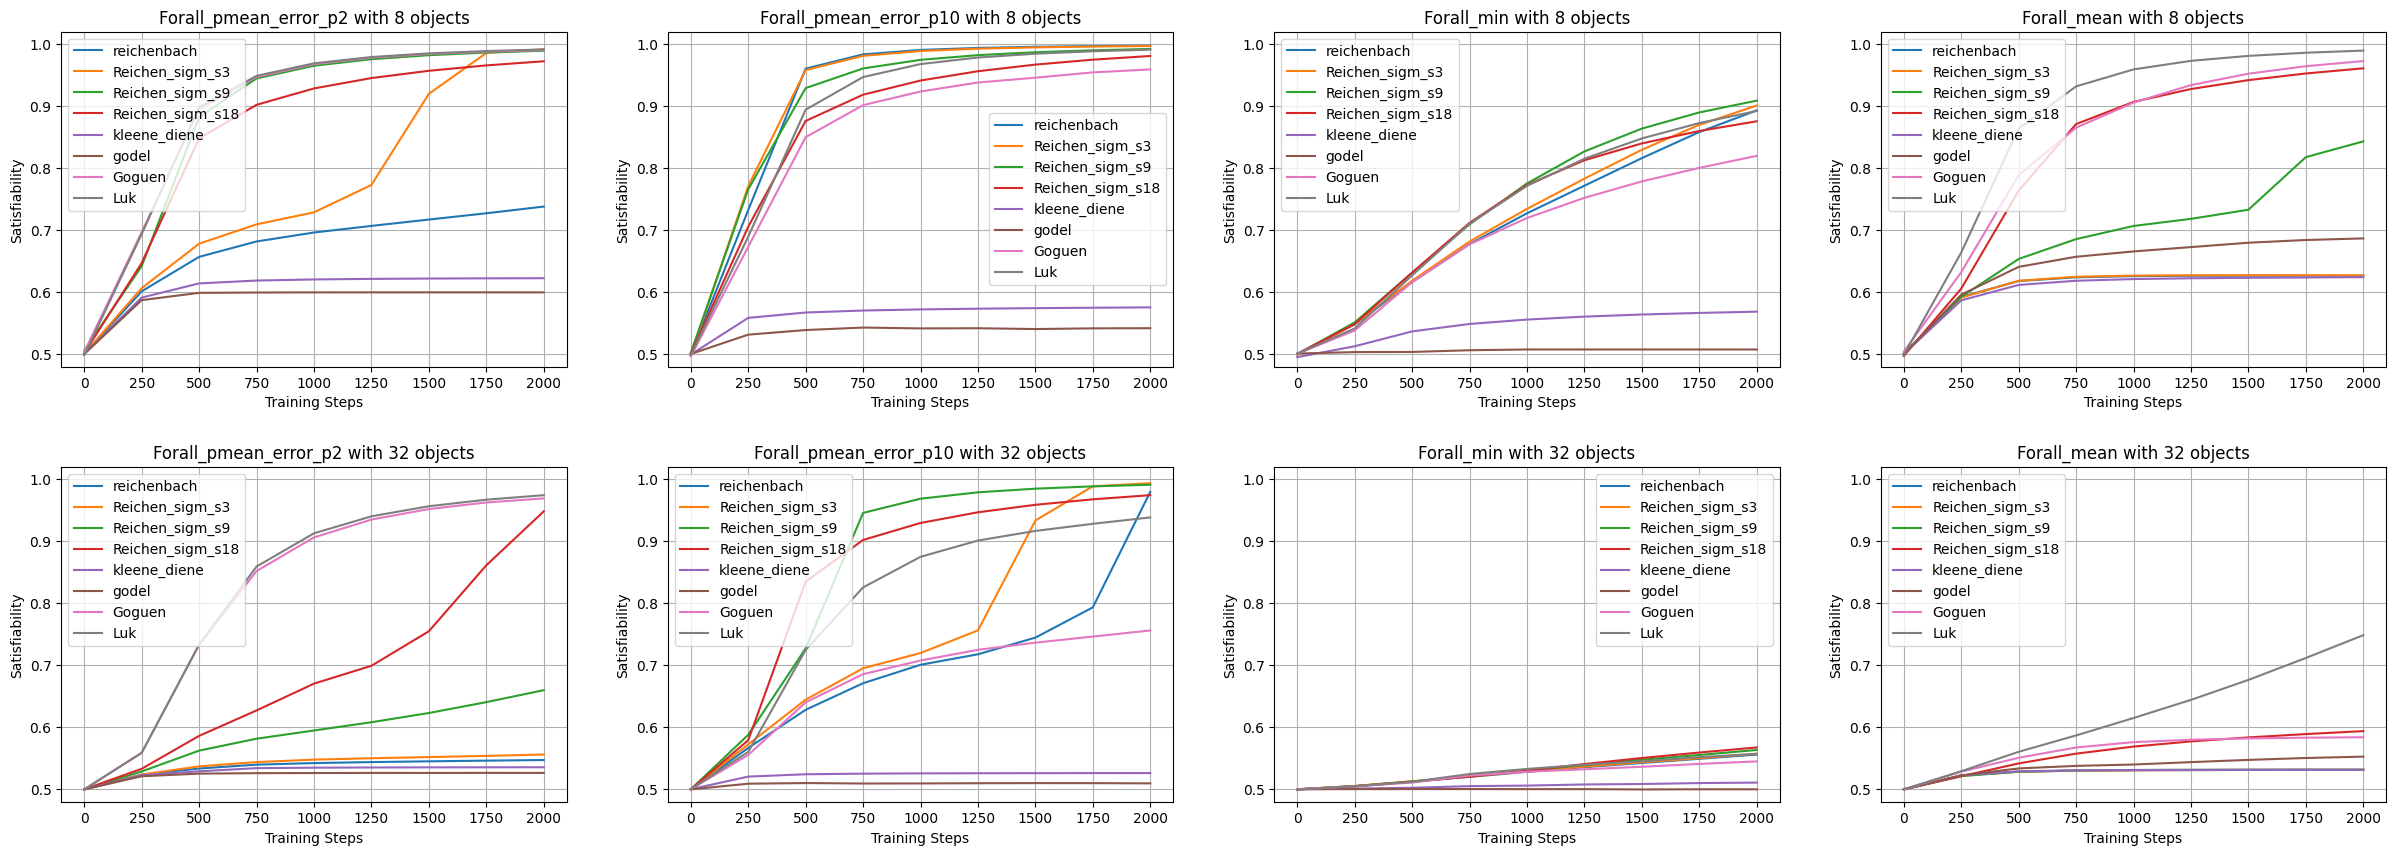

In [34]:
fig, axs = plt.subplots(2, 4, figsize=(30, 10))  # 1 row, 4 columns

training_steps_indices = range(0,41,5)
training_steps = [50*i for i in training_steps_indices]

for j, object_dim in enumerate([8, 32]):
    for i, Forall in enumerate(Forall_dict):
        for Implies in Implies_dict:
            sat_values = []
            data = results[object_dim][Forall][Implies]
            for k in training_steps_indices:
                sat = get_sat(data[k], p=1)
                sat_values.append(sat)

            # Plot on the corresponding subplot
            axs[j, i].plot(training_steps, sat_values, label=Implies[8:])
            axs[j, i].set_title(f"{Forall} with {object_dim} objects")
            # axs[j, i].legend(loc='upper left')
            axs[j, i].legend()

            axs[j, i].grid(True)
            axs[j, i].set_xlabel("Training Steps")
            axs[j, i].set_ylabel("Satisfiability")
            axs[j, i].set_ylim(0.48, 1.02)


plt.subplots_adjust(wspace=0.2, hspace=0.3)  # Adjust width spacing as needed
plt.grid(True)

plt.show()

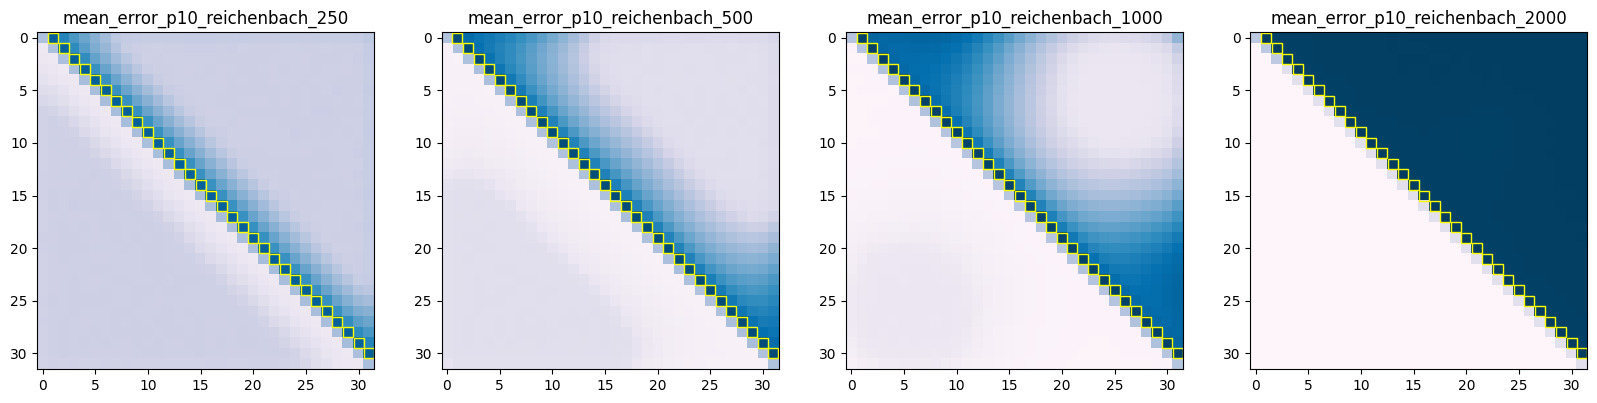

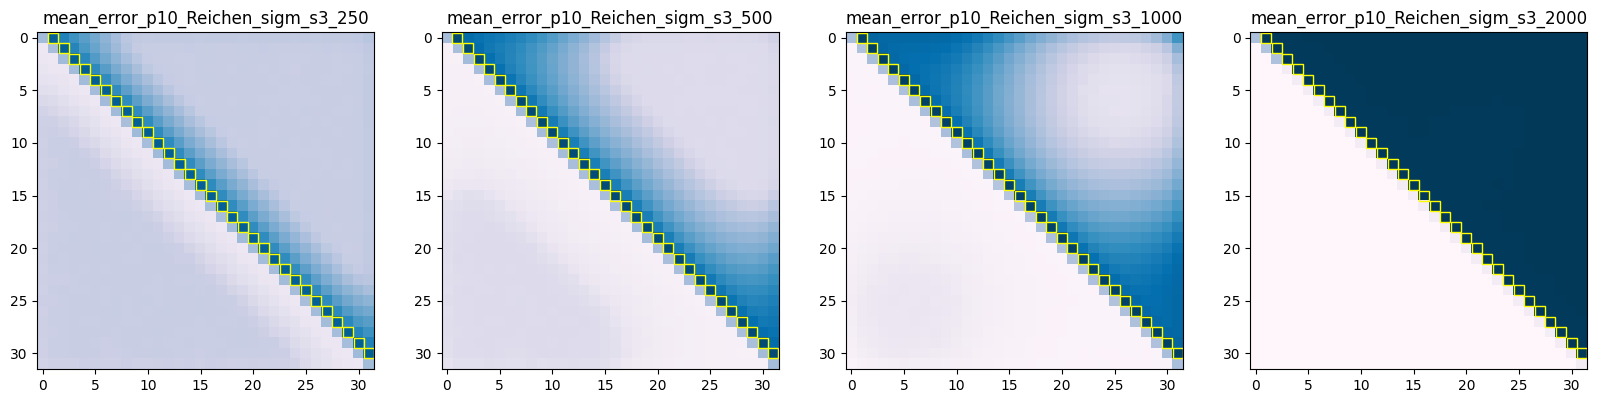

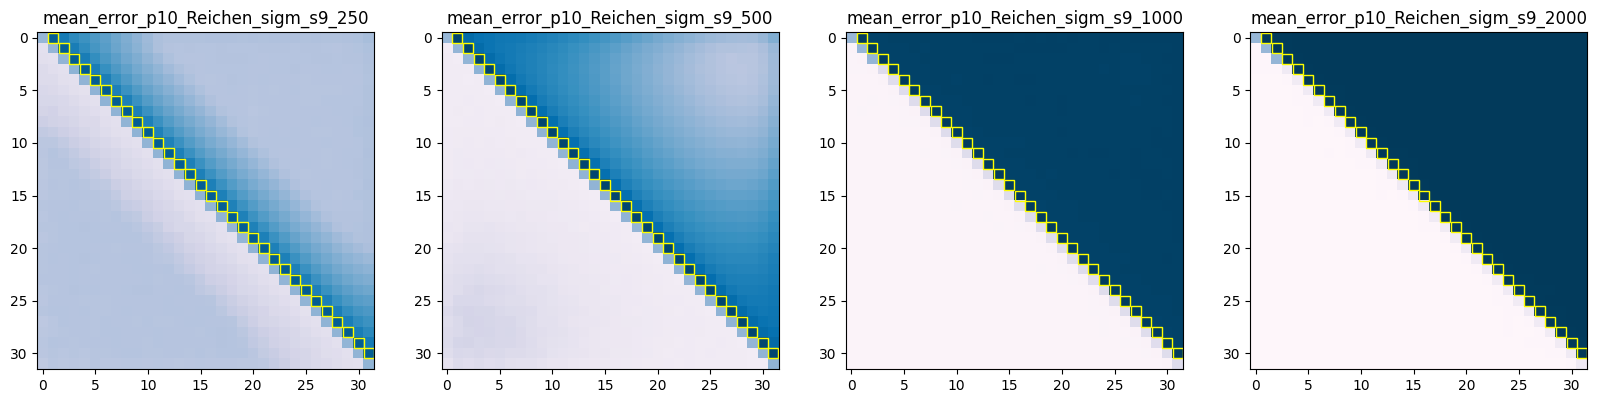

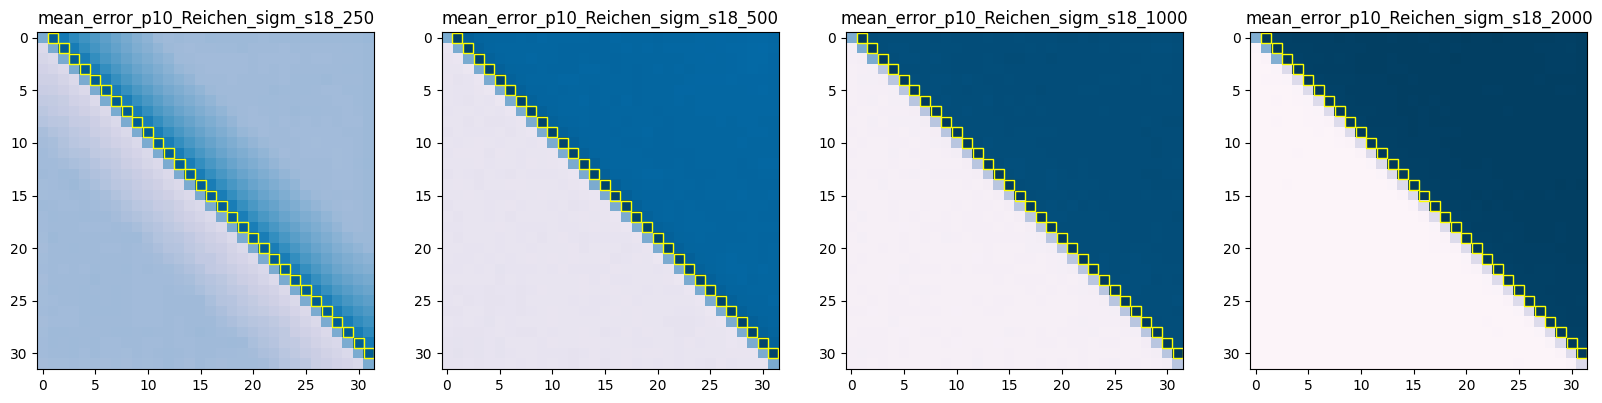

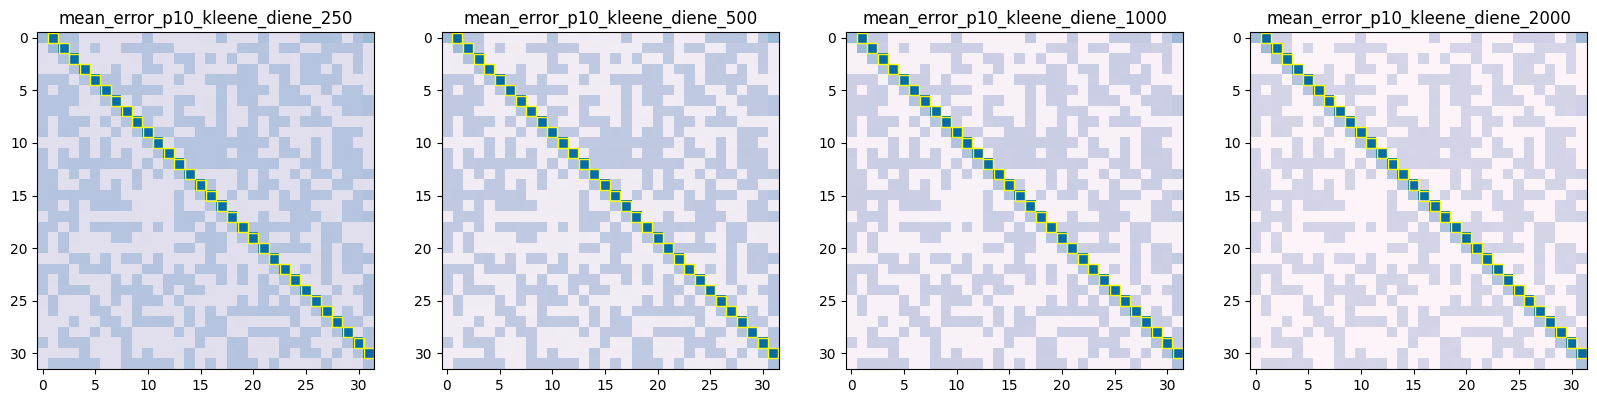

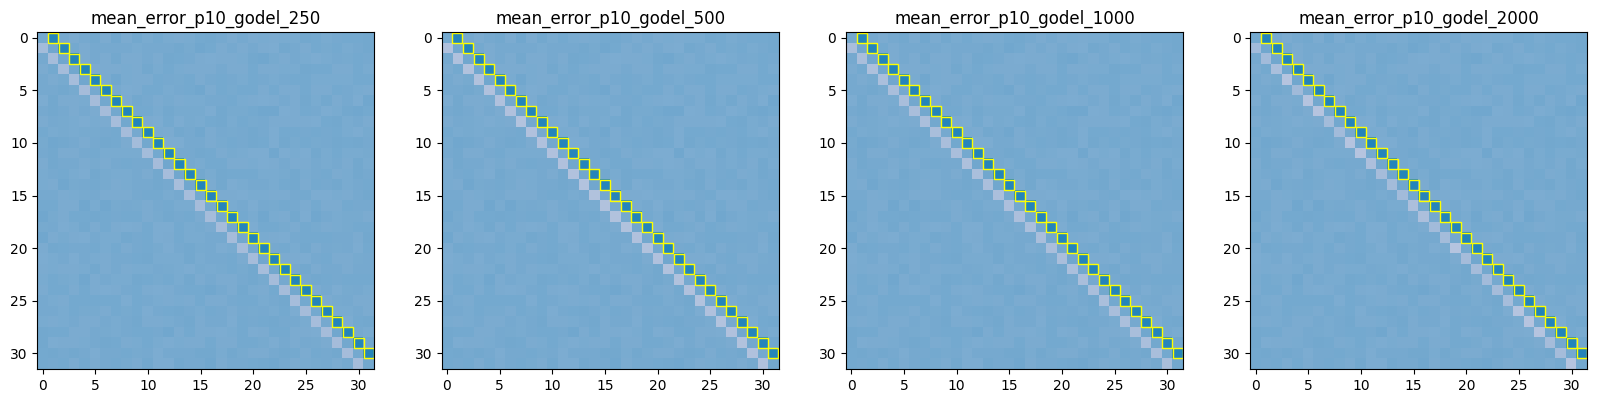

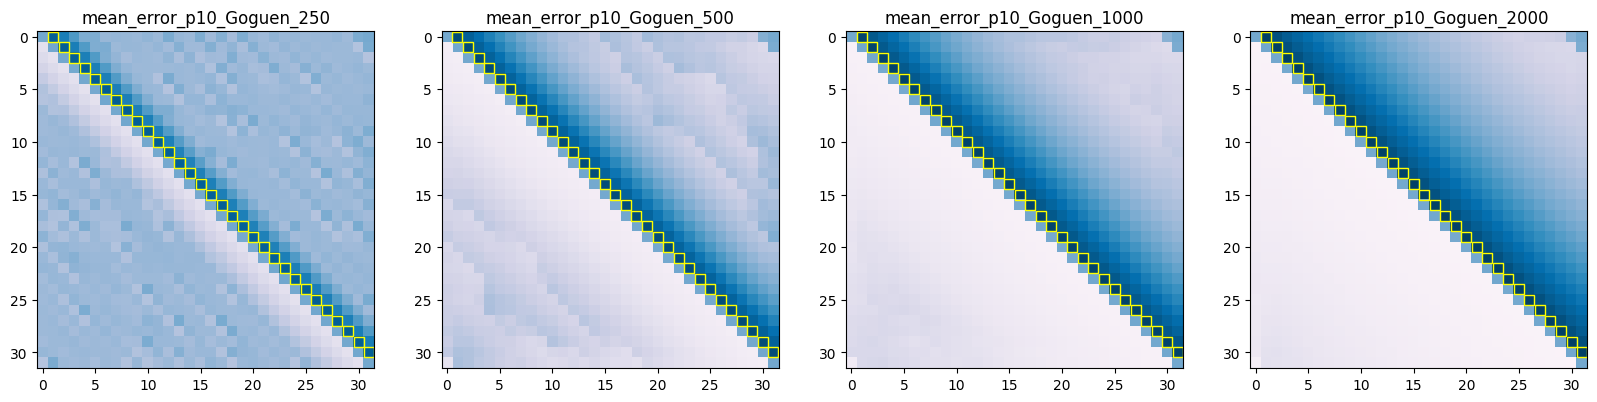

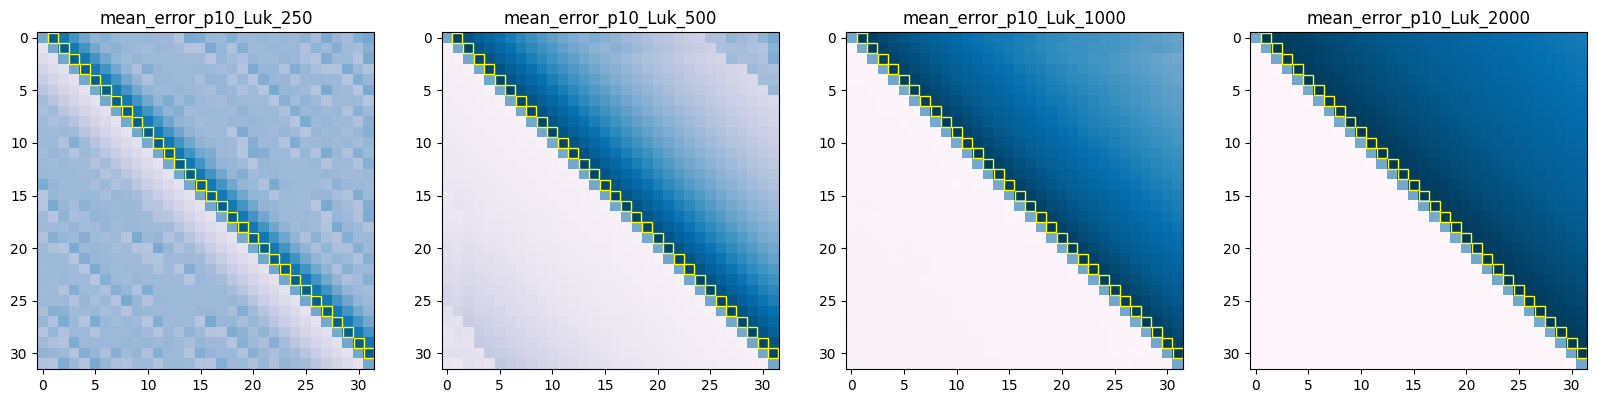

In [35]:
Forall = "Forall_pmean_error_p10"
object_dim = 32
pos_examples = [[i, i+1] for i in range(object_dim-1)]
for Implies in Implies_dict:
# for Implies in ["Implies_reichenbach",
# "Implies_Reichen_sigm_s3",
# "Implies_Reichen_sigm_s9",
# "Implies_Reichen_sigm_s18",]:


# for Implies in [
    # "Implies_kleene_diene",
# "Implies_godel",
# "Implies_Goguen",]:
    fig, axs = plt.subplots(1, 4, figsize=(20, 5))
    for i, data_i in enumerate([5, 10, 20, 40]):
        data = results[object_dim][Forall][Implies]
        text = f"{Forall[8:]}_{Implies[8:]}_{50*data_i}"
        axs[i].imshow(data[data_i], cmap="PuBu", vmin=0, vmax=1)
        axs[i].set_title(text)

        for row, col in pos_examples:
            axs[i].add_patch(
                plt.Rectangle(
                    (col - 0.475, row - 0.475),
                    0.95,
                    0.95,
                    edgecolor="yellow",
                    fill=False,
                    lw=1,
                )
            )
    file_name = f"{Forall[8:]}_{Implies[8:]}_{object_dim}.png"
    data_dir = "plots/trans_abl"
    file_path = os.path.join(
                data_dir,
                file_name
            )
    plt.savefig(
        file_path,
        # dpi=dpi,
        bbox_inches="tight",
        # pad_inches=0.0,
    )
    # plt.show()
    # break

In [36]:
# def save_plot_heatmap(data, pos_examples, file_name, text=None):
#     plt.imshow(data, cmap="PuBu", vmin=0, vmax=1)
#     # plt.colorbar()
#     if text:
#         plt.title(text)

#     # Mark specific grids (if provided)
#     for row, col in pos_examples:
#         plt.gca().add_patch(
#             plt.Rectangle(
#                 (col - 0.475, row - 0.475),
#                 0.95,
#                 0.95,
#                 edgecolor="yellow",
#                 fill=False,
#                 lw=1,
#             )
#         )
#     data_dir = "plots/trans_abl"
#     file_path = os.path.join(
#                 data_dir,
#                 file_name
#             )
#     plt.savefig(
#         file_path,
#         # dpi=dpi,
#         bbox_inches="tight",
#         # pad_inches=0.0,
#     )